<a href="https://colab.research.google.com/github/mmusab/MNIST-classification2/blob/master/image_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
  #@title Default title text
import tensorflow as tf
import numpy as np
from tensorboardcolab import * 
from google.colab.patches import cv2_imshow
# loading data

# from tensorflow.examples.tutorials.mnist import input_data
# mn = input_data.read_data_sets("MNIST_data/", one_hot=True)

((train_data,train_labels),(eval_data,eval_labels)) = tf.keras.datasets.fashion_mnist.load_data()
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)
X = tf.placeholder("float")/np.float32(255)
Y = tf.placeholder("int32")
x = np.array_split(train_data,len(train_data)/10000)
y = np.array_split(train_labels,len(train_labels)/10000)
#..................... making model ...................
# input layer
input_layer = tf.reshape(X,[-1, 28, 28, 1])

# 1st convolution layer
conv1 = tf.layers.conv2d(inputs=input_layer, filters=32, kernel_size=5, padding="same", activation=tf.nn.relu)

# 1st pooling layer
pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=2, strides=2)

# 2nd convolution layer
conv2 = tf.layers.conv2d(inputs=pool1, filters=64, kernel_size=5, padding="same", activation=tf.nn.relu)

# 2nd pooling layer
pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=2, strides=2)

pool2_flat = tf.reshape(pool2,[-1, 7*7*64])

# dense layer
dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)

# logit layer
logit = tf.layers.dense(inputs=dense, units=10)

# loss function
loss = tf.losses.sparse_softmax_cross_entropy(labels=Y, logits=logit )

# optimization
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
training = optimizer.minimize(loss)


model = tf.global_variables_initializer()
saver = tf.train.Saver()

# tbc = TensorBoardColab() # To create a tensorboardcolab object it will automatically creat a link
# writer = tbc.get_writer() # To create a FileWriter
# writer.add_graph(tf.get_default_graph()) # add the graph 
# writer.flush()

with tf.Session() as sess:
    writer = tf.summary.FileWriter("./check3", sess.graph)
    sess.run(model)
    for i in range(20):
        print ("hello")
        for ii in range(len(x)):
            sess.run(training, feed_dict={X:x[ii], Y:y[ii]})
    save_path = saver.save(sess, "./check3/model.ckpt")
    writer.close()
with tf.Session() as sess1:
    saver.restore(sess1, save_path)
    prediction = logit.eval(feed_dict={X: eval_data[0:5]})



1


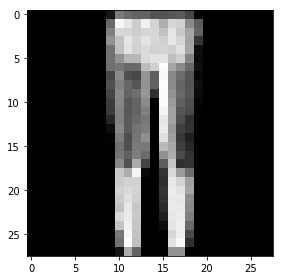

In [13]:
import tensorflow as tf
import numpy as np
import skimage
X = tf.placeholder("float")
softmax = tf.nn.softmax(X)
#softmax = tf.exp(X) / tf.reduce_sum(tf.exp(X))
# pred = tf.placeholder("float")


# l = tf.math.softmax(pred)
# with tf.Session() as sess:
#   out = l.eval(feed_dict={pred:prediction})
w=3
with tf.Session():
  out = softmax.eval(feed_dict={X:prediction})
print (np.argmax(out[w]))
skimage.io.imshow(eval_data[w])